# Machine learning assignment 1: Running a Classification Tree

## Dataset: Bike sharing

I am using the bike sharing dataset of https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset, which provides data on how many bikes are rent out to casual users and registered users on specific hours of specific days, the weather on these days, whether the day was a workingday or not, etc. So far I have taken the number of rented out bikes as a response variable, but for this exercise I decided to flip that around and try to predict wether it was a working day or not based on the number of bikes rent out by casual and registered users.

 ## Loading data

In [71]:
%matplotlib inline
import numpy
import pandas
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

data = pandas.read_csv('day.csv', low_memory=False)
print("Number of observations: ",len(data))
data.head()

Number of observations:  731


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Training the decision tree

In [72]:
predictors = data[['casual','registered','temp','weathersit']]
targets = data.workingday
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

In [73]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train,tar_train)
predictions = classifier.predict(pred_test)

## Evaluating the decision tree

In [74]:
print("confusion matrix:\n",sklearn.metrics.confusion_matrix(tar_test,predictions))

confusion matrix:
 [[ 75   8]
 [ 16 194]]


In [75]:
print("accuracy :",sklearn.metrics.accuracy_score(tar_test, predictions))

accuracy : 0.918088737201


## Plotting the decision tree

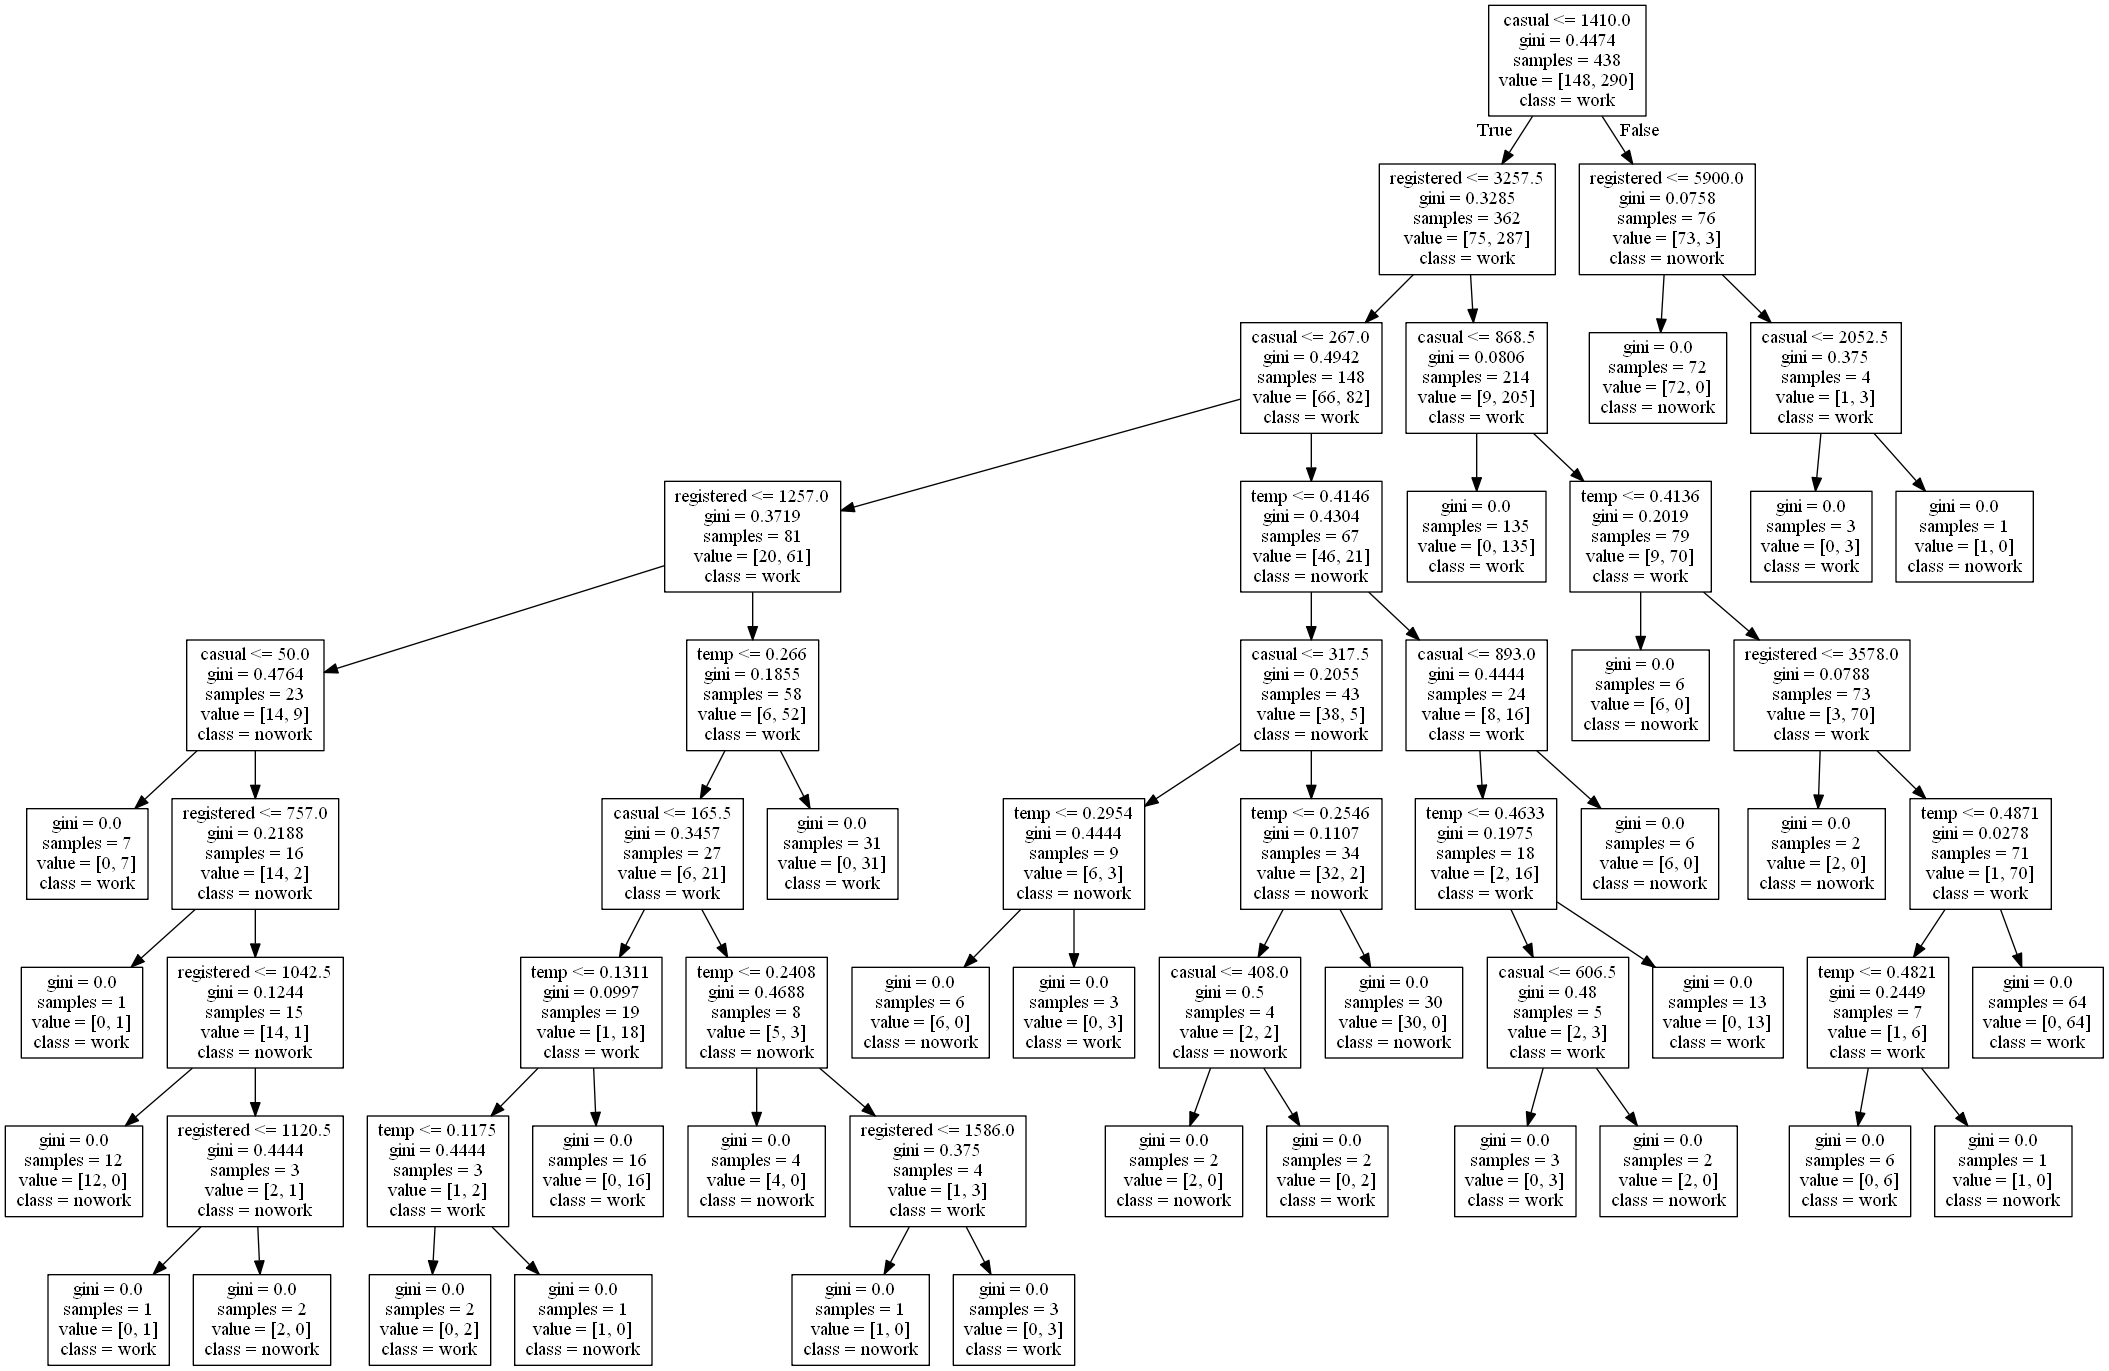

In [76]:
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus

out = StringIO()
tree.export_graphviz(classifier, out_file=out, feature_names=["casual","registered","temp","weathersit"], class_names=["nowork","work"])
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

## Plotting a simpler decision tree
Since the tree above is somewhat hard to grasp, I decided to also generate a simpler version with reduced depth.

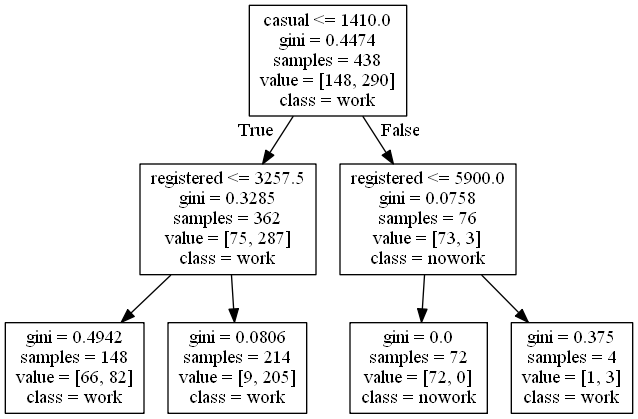

In [77]:
classifier_simple = DecisionTreeClassifier(max_depth=2)
classifier_simple = classifier_simple.fit(pred_train,tar_train)

out_simple = StringIO()
tree.export_graphviz(classifier_simple, out_file=out_simple, feature_names=["casual","registered","temp","weathersit"], class_names=["nowork","work"])
graph=pydotplus.graph_from_dot_data(out_simple.getvalue())
Image(graph.create_png())

This tree shows the relation between bikes rent by casual users, bikes rent by registered users and working day in a clearer manner. It is likely to be a working day, if the number of bikes rent by casual users is small (<=1433) and the number of bikes rent by registered users is larg (>3112), see the second leaf from the left. It is not likely to be a working day if the number of casual users is high (>1433) and the number of registered users is small (<=5609).